In [1]:
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pyemma
import mdtraj
import scipy.spatial.distance as sdist
import numpy as np
import prody
import itertools
import scipy.optimize

In [2]:
#List simulation files
data=[]
param_files=glob.glob('/media/cb/SATA8TB/Simulations_August2022/Box/*.param')
for param_file in param_files:
    #Add parameters
    with open(param_file) as param:
        values={}
        for line in param:
            if len(line)==0:
                continue
            line=line.strip().split(',')
            key=line[0]
            value=line[1]
            if key=='':
                continue
            values.update({key:value})
            root='.'.join(param_file.split('.')[:-1])
            values.update({'root':root})
    #Add files
    for extension in ['param','cif','pdb','dcd','log']:
        file_name=f'{root}.{extension}'
        if os.path.exists(file_name):
            values.update({extension:file_name})
    data+=[values]
    
simulations=pd.DataFrame(data)
simulations[['epsilon','w1','w2_ratio']]=simulations[['epsilon','w1','w2_ratio']].astype(float)

simulations=simulations.sort_values(['epsilon','w1','w2_ratio'])
simulations=simulations.reindex()
simulations=simulations.reset_index(drop=True)
simulations

,epsilon,root,w1,w2_ratio,aligned,monomers,disorder,box_size,n_actins,n_abps,...,SLURM_JOB_ACCOUNT,SLURM_JOB_NUM_NODES,test_run,date,name,job_id,param,cif,dcd,log
0,100.0,/media/cb/SATA8TB/Simulations_August2022/Box/E...,1.0,0.1,False,225,0,5000,3,128,...,commons,1,False,2022_08_26,Simulations/Box/Epsilon_BoxFAS_007_e_100_w_1.0...,7,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...
1,100.0,/media/cb/SATA8TB/Simulations_August2022/Box/E...,1.0,0.1,False,225,0,5000,3,128,...,commons,1,False,2022_08_26,Simulations/Box/Epsilon_BoxFAS_002_e_100_w_1.0...,2,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...
2,100.0,/media/cb/SATA8TB/Simulations_August2022/Box/E...,1.0,0.1,False,225,0,5000,3,128,...,commons,1,False,2022_08_26,Simulations/Box/Epsilon_BoxFAS_001_e_100_w_1.0...,1,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...
3,100.0,/media/cb/SATA8TB/Simulations_August2022/Box/E...,1.0,0.1,False,225,0,5000,3,128,...,commons,1,False,2022_08_26,Simulations/Box/Epsilon_BoxFAS_003_e_100_w_1.0...,3,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...
4,100.0,/media/cb/SATA8TB/Simulations_August2022/Box/E...,1.0,0.1,False,225,0,5000,3,128,...,commons,1,False,2022_08_26,Simulations/Box/Epsilon_BoxFAS_004_e_100_w_1.0...,4,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,200.0,/media/cb/SATA8TB/Simulations_August2022/Box/E...,3.0,0.1,False,225,0,5000,3,128,...,commons,1,False,2022_08_26,Simulations/Box/Epsilon_BoxFAS_069_e_200_w_3.0...,69,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...
68,200.0,/media/cb/SATA8TB/Simulations_August2022/Box/E...,3.0,0.1,False,225,0,5000,3,128,...,commons,1,False,2022_08_26,Simulations/Box/Epsilon_BoxFAS_065_e_200_w_3.0...,65,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...
69,200.0,/media/cb/SATA8TB/Simulations_August2022/Box/E...,3.0,0.1,False,225,0,5000,3,128,...,commons,1,False,2022_08_26,Simulations/Box/Epsilon_BoxFAS_071_e_200_w_3.0...,71,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...
70,200.0,/media/cb/SATA8TB/Simulations_August2022/Box/E...,3.0,0.1,False,225,0,5000,3,128,...,commons,1,False,2022_08_26,Simulations/Box/Epsilon_BoxFAS_070_e_200_w_3.0...,70,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...


@> 2982 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.03s.


/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_007_e_100_w_1.0_r_7 838


/home/cb/miniconda3/envs/openmm_dev/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in square
/home/cb/miniconda3/envs/openmm_dev/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in square
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.
/home/cb/miniconda3/envs/openmm_dev/lib/python3.6/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/cb/miniconda3/envs/openmm_dev/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in add
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.03s.


/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_003_e_100_w_1.0_r_3 532
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_004_e_100_w_1.0_r_4 449


/home/cb/miniconda3/envs/openmm_dev/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in true_divide
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.03s.


/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_000_e_100_w_1.0_r_0 595


/home/cb/miniconda3/envs/openmm_dev/lib/python3.6/site-packages/ipykernel_launcher.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/cb/miniconda3/envs/openmm_dev/lib/python3.6/site-packages/ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in true_divide
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.03s.
/home/cb/miniconda3/envs/openmm_dev/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in square
/home/cb/miniconda3/envs/openmm_dev/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in square
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.
/home/cb/miniconda3/envs/openmm_dev/lib/python3.6/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/cb/miniconda3/envs/openmm_dev/lib/python3.6/site-packages/ipykernel_launcher.py:46: R

/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_014_e_100_w_2.0_r_6 833
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_009_e_100_w_2.0_r_1 757
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_008_e_100_w_2.0_r_0 671


@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.


/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_013_e_100_w_2.0_r_5 657
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_012_e_100_w_2.0_r_4 489


@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.


/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_018_e_100_w_3.0_r_2 762


@> 2982 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.03s.


/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_019_e_100_w_3.0_r_3 712


@> 2982 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.


/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_023_e_100_w_3.0_r_7 836


@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.03s.


/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_028_e_150_w_1.0_r_4 407
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_030_e_150_w_1.0_r_6 370


@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.


/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_024_e_150_w_1.0_r_0 355
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_027_e_150_w_1.0_r_3 274
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_026_e_150_w_1.0_r_2 297


@> 2982 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.


/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_031_e_150_w_1.0_r_7 492
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_025_e_150_w_1.0_r_1 866
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_029_e_150_w_1.0_r_5 387


@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.


/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_032_e_150_w_2.0_r_0 991
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_039_e_150_w_2.0_r_7 804


@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.


/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_038_e_150_w_2.0_r_6 543
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_034_e_150_w_2.0_r_2 397
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_035_e_150_w_2.0_r_3 323


@> 2982 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.03s.


/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_036_e_150_w_2.0_r_4 529
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_033_e_150_w_2.0_r_1 411


@> 2982 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.


/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_045_e_150_w_3.0_r_5 943
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_041_e_150_w_3.0_r_1 775
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_046_e_150_w_3.0_r_6 418


@> 2982 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.


/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_042_e_150_w_3.0_r_2 303
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_043_e_150_w_3.0_r_3 277
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_044_e_150_w_3.0_r_4 706


/home/cb/miniconda3/envs/openmm_dev/lib/python3.6/site-packages/ipykernel_launcher.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/cb/miniconda3/envs/openmm_dev/lib/python3.6/site-packages/ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in true_divide
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.


/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_047_e_150_w_3.0_r_7 132
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_053_e_200_w_1.0_r_5 545


@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.


/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_049_e_200_w_1.0_r_1 283
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_055_e_200_w_1.0_r_7 696
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_054_e_200_w_1.0_r_6 225


@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.03s.


/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_052_e_200_w_1.0_r_4 294
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_051_e_200_w_1.0_r_3 227
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_050_e_200_w_1.0_r_2 204


@> 2982 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.


/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_048_e_200_w_1.0_r_0 688
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_062_e_200_w_2.0_r_6 372
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_063_e_200_w_2.0_r_7 490


@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.


/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_059_e_200_w_2.0_r_3 251
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_058_e_200_w_2.0_r_2 83


@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.03s.


/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_061_e_200_w_2.0_r_5 683
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_056_e_200_w_2.0_r_0 292
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_060_e_200_w_2.0_r_4 146


@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.


/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_057_e_200_w_2.0_r_1 393
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_064_e_200_w_3.0_r_0 526


/home/cb/miniconda3/envs/openmm_dev/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in square
/home/cb/miniconda3/envs/openmm_dev/lib/python3.6/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/cb/miniconda3/envs/openmm_dev/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in square
/home/cb/miniconda3/envs/openmm_dev/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in add
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.03s.


/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_066_e_200_w_3.0_r_2 942
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_069_e_200_w_3.0_r_5 441


@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 2982 atoms and 1 coordinate set(s) were parsed in 0.03s.


/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_065_e_200_w_3.0_r_1 487
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_071_e_200_w_3.0_r_7 881
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_070_e_200_w_3.0_r_6 425
/media/cb/SATA8TB/Simulations_August2022/Box/Epsilon_BoxFAS_067_e_200_w_3.0_r_3 532


<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

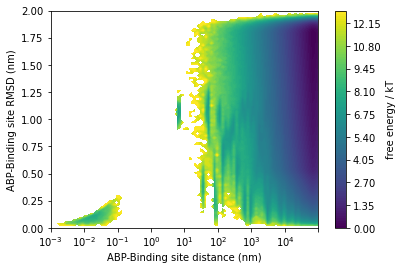

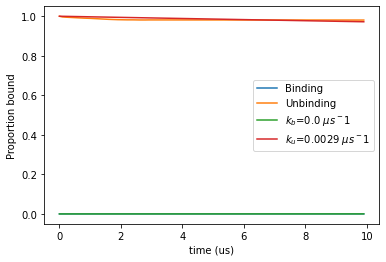

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

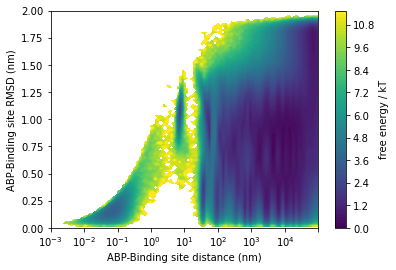

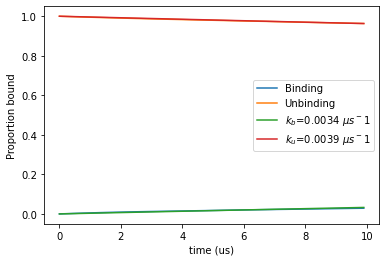

<Figure size 720x360 with 0 Axes>

In [21]:
start=0
stride=1
data=[]
for i,simulation in simulations.iterrows():
    selected_simulation=simulation

    root=selected_simulation['root']
    dcd=selected_simulation['dcd']
    cif=selected_simulation['cif']
    #!vmd -e ../Box_vis_500.vmd $cif $dcd


    try:
        cif=prody.parseMMCIF(selected_simulation['cif'])
    except KeyError:
        continue
    pdbx=mdtraj.formats.pdbx.load_pdbx(selected_simulation['cif'])
    dcd=mdtraj.load_dcd(selected_simulation['dcd'],top=pdbx)
    dcd.unitcell_vectors=np.array([[[500,0,0],[0,500,0],[0,0,500]]]*len(dcd))

    if len(dcd)<1000:
        print(root,len(dcd))
        continue
    
    s={}
    for name in ['Aa','Ab','Ac','Ca','Cb','Cd']:
        selection=cif.select(f'name {name}')
        #dcd.setAtoms(selection)
        s.update({name:selection.getIndices()})
    #d1=np.array([sdist.cdist(a,b) for a,b in zip(s['Aa'],s['Ca'])])
    #d2=np.array([sdist.cdist(a,b) for a,b in zip(s['Ab'],s['Cb'])])
    #d3=np.array([sdist.cdist(a,b) for a,b in zip(s['Ac'],s['Cd'])])

    selection=cif.select('name Ca')
    dcdt=dcd[start::stride]
    
    d1=mdtraj.compute_distances(dcdt,np.array([a for a in itertools.product(s['Aa'],s['Ca'])]),periodic=True)
    d2=mdtraj.compute_distances(dcdt,np.array([a for a in itertools.product(s['Ab'],s['Cb'])]),periodic=True)
    d3=mdtraj.compute_distances(dcdt,np.array([a for a in itertools.product(s['Ac'],s['Cd'])]),periodic=True)

    actin_com=(dcdt.xyz[:,s['Aa']]+dcdt.xyz[:,s['Ab']]+dcdt.xyz[:,s['Ac']])/3
    abp_com=(dcdt.xyz[:,s['Ca']]+dcdt.xyz[:,s['Cb']]+dcdt.xyz[:,s['Cd']])/3
    translation=np.expand_dims(abp_com,axis=1)-np.expand_dims(actin_com,axis=2)
    rmsd_abp=((((np.expand_dims(dcdt.xyz[:,s['Ca']],axis=1)-translation-np.expand_dims(dcdt.xyz[:,s['Aa']],axis=2))**2).sum(axis=3)+
               ((np.expand_dims(dcdt.xyz[:,s['Cb']],axis=1)-translation-np.expand_dims(dcdt.xyz[:,s['Ab']],axis=2))**2).sum(axis=3)+
               ((np.expand_dims(dcdt.xyz[:,s['Cd']],axis=1)-translation-np.expand_dims(dcdt.xyz[:,s['Ac']],axis=2))**2).sum(axis=3))/3)**.5
    rmsd_abp.shape

    dd=(d1**2+d2**2+d3**2)/3
    g1=-1*(np.exp(-dd/1.0)+np.exp(-dd/0.01*1.0))/2*(d1<12.0)
    g1.shape

    g2=g1.reshape(len(g1),len(s['Aa']),len(s['Ca']))
    g2.shape

    g3_total_bind = (g2<-0.2).sum(axis=1).T>0
    g3_partial_bind = (g2<0).sum(axis=1).T > 0
    g3_states=[g3_total_bind[:,0]]
    for t in range(1,len(g3_total_bind.T)):
        g3_state=g3_total_bind[:,t] | (g3_states[-1] & g3_partial_bind[:,t])
        g3_states+=[g3_state]
    g3=np.array(g3_states).T
    Actin_binding=g3*1

    g3_total_bind = (g2<-0.2).sum(axis=2).T>0
    g3_partial_bind = (g2<0).sum(axis=2).T > 0
    g3_states=[g3_total_bind[:,0]]
    for t in range(1,len(g3_total_bind.T)):
        g3_state=g3_total_bind[:,t] | (g3_states[-1] & g3_partial_bind[:,t])
        g3_states+=[g3_state]
    g3=np.array(g3_states).T
    ABP_binding=g3*1


    Actin_binding[0].sum()

    Actin_binding_pair=g2.argmin(axis=1).T
    ABP_binding_pair=g2.argmin(axis=2).T
    Actin_binding_pair[Actin_binding==0]=-99999
    ABP_binding_pair[ABP_binding==0]=-99999

    plt.figure(figsize=(10,5))
    try:
        fig,ax=pyemma.plots.plot_free_energy(np.log10((dd**.5).ravel()),rmsd_abp.ravel(),cmap='viridis')
    except ValueError:
        continue
    ax.set_xlim(-1.5,2.5)
    ax.set_ylim(0,2)
    ax.set_xticklabels([rf'$10^{{{i}}}$' for i in range(-3,5)])
    ax.set_xlabel('ABP-Binding site distance (nm)')
    ax.set_ylabel('ABP-Binding site RMSD (nm)')
    plt.savefig(f'{root}_FreeEnergy.png')

    sel=ABP_binding[:,200:]
    skip=0
    bound0=0
    bound1=1
    temp=[[skip,bound0,bound1]]
    for skip in range(1,100):
        bound0=sel[:,:-skip][sel[:,skip:]==0].mean()
        bound1=sel[:,:-skip][sel[:,skip:]==1].mean()
        t=skip*float(simulation['frequency'])/10**6
        temp+=[[t,bound0,bound1]]
    b_t=pd.DataFrame(temp,columns=['t','B_0','B_1'])
    b_t=b_t.dropna()
    if len(b_t)<10:
        continue
    t=b_t['t']

    bound=b_t['B_0'].values
    unbound=1-b_t['B_1'].values
    bound_ratio=(bound/unbound)[1:]
    K=bound_ratio.mean()
    y=bound+unbound
    kt=-np.log(1-y[1])/t[1]
    k=scipy.optimize.curve_fit(lambda t,k : (1-np.exp(-k*t)), t, y, p0=[kt])[0][0]
    k2=k/(1+K)
    k1=k2*K
    Aeq=k2/k
    Beq=k1/k
    plt.figure()
    plt.plot(b_t['t'],b_t['B_0'])
    plt.plot(b_t['t'],b_t['B_1'])
    plt.plot(t,k1/(k1+k2)*(1-np.exp(-(k1+k2)*t)))
    plt.plot(t,k1/(k1+k2)*(1-(1-(k1+k2)/k1)*np.exp(-(k1+k2)*t)))
    plt.xlabel('time (us)')
    plt.ylabel('Proportion bound')
    plt.legend(['Binding',
                'Unbinding',
                r'$k_b$='f'{np.round(k1,4)} ' r'$\mu s^-1$',
                r'$k_u$='f'{np.round(k2,4)} ' r'$\mu s^-1$'])
    plt.savefig(f'{root}_BindingRate.png')
    events=ABP_binding[:,1:]-ABP_binding[:,:-1]
    unbinding_events=(events<0).sum()
    binding_events=(events>0).sum()
    data+=[[i,binding_events,unbinding_events,k1,k2,K]]

In [19]:
kinetics_data=pd.DataFrame(data,columns=['index','binding_events','unbinding_events','k1','k2','K'])
kinetics_data.index=kinetics_data['index']
simulation_kinetics=pd.concat([simulations,kinetics_data],axis=1)
simulation_kinetics

,epsilon,root,w1,w2_ratio,aligned,monomers,disorder,box_size,n_actins,n_abps,...,param,cif,dcd,log,index,binding_events,unbinding_events,k1,k2,K
0,100.0,/media/cb/SATA8TB/Simulations_August2022/Box/E...,1.0,0.1,False,225,0,5000,3,128,...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,NaN,NaN,NaN,NaN,NaN,NaN
1,100.0,/media/cb/SATA8TB/Simulations_August2022/Box/E...,1.0,0.1,False,225,0,5000,3,128,...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,NaN,NaN,NaN,NaN,NaN,NaN
2,100.0,/media/cb/SATA8TB/Simulations_August2022/Box/E...,1.0,0.1,False,225,0,5000,3,128,...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,NaN,NaN,NaN,NaN,NaN,NaN
3,100.0,/media/cb/SATA8TB/Simulations_August2022/Box/E...,1.0,0.1,False,225,0,5000,3,128,...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,/media/cb/SATA8TB/Simulations_August2022/Box/E...,1.0,0.1,False,225,0,5000,3,128,...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,200.0,/media/cb/SATA8TB/Simulations_August2022/Box/E...,3.0,0.1,False,225,0,5000,3,128,...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,NaN,NaN,NaN,NaN,NaN,NaN
68,200.0,/media/cb/SATA8TB/Simulations_August2022/Box/E...,3.0,0.1,False,225,0,5000,3,128,...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,NaN,NaN,NaN,NaN,NaN,NaN
69,200.0,/media/cb/SATA8TB/Simulations_August2022/Box/E...,3.0,0.1,False,225,0,5000,3,128,...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,NaN,NaN,NaN,NaN,NaN,NaN
70,200.0,/media/cb/SATA8TB/Simulations_August2022/Box/E...,3.0,0.1,False,225,0,5000,3,128,...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,/media/cb/SATA8TB/Simulations_August2022/Box/E...,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
simulation_kinetics.describe()

,epsilon,w1,w2_ratio,index,binding_events,unbinding_events,k1,k2,K
count,72.000000,72.000000,7.200000e+01,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,150.000000,2.000000,1.000000e-01,26.500000,111.500000,65.000000,0.001737,0.003323,0.447286
std,41.111323,0.822226,1.397518e-17,27.577164,137.885822,74.953319,0.002428,0.000803,0.622420
min,100.000000,1.000000,1.000000e-01,7.000000,14.000000,12.000000,0.000020,0.002755,0.007169
25%,100.000000,1.000000,1.000000e-01,16.750000,62.750000,38.500000,0.000878,0.003039,0.227228
50%,150.000000,2.000000,1.000000e-01,26.500000,111.500000,65.000000,0.001737,0.003323,0.447286
75%,200.000000,3.000000,1.000000e-01,36.250000,160.250000,91.500000,0.002595,0.003607,0.667345
max,200.000000,3.000000,1.000000e-01,46.000000,209.000000,118.000000,0.003453,0.003891,0.887404


In [9]:
temp=simulation_kinetics.groupby(['w1','epsilon','aligned','n_abps']).mean().reset_index()
temp[(temp['n_abps']=='128') & (temp['aligned']=='False')].pivot_table(values='unbinding_events',index='w1',columns='epsilon')

epsilon,100.0,150.0
w1,,
1.0,12.0,NaN
3.0,NaN,118.0


In [10]:
temp['n_abps'].unique()

array(['128'], dtype=object)

In [13]:
simulation_kinetics.to_csv('Simulation_kinetics_20220912.csv')

# Single Simulation

In [63]:
simulations[(simulations['epsilon']==100) &
            (simulations['w1']==3.0) & 
            (simulations['n_abps']=='128') &
            (simulations['aligned']=='False')]

,epsilon,root,w1,w2_ratio,aligned,actinLen,disorder,box_size,n_actins,n_abps,...,SLURM_JOB_ACCOUNT,SLURM_JOB_NUM_NODES,test_run,date,name,job_id,param,cif,dcd,log
252,100.0,/media/cb/SATA8TB/Simulations_July2022/Box/Eps...,3.0,0.1,False,75,0,5000,3,128,...,commons,1,False,2022_07_07,Simulations/Box/Epsilon_Box3uM_037_e_100_w_3.0...,37,/media/cb/SATA8TB/Simulations_July2022/Box/Eps...,/media/cb/SATA8TB/Simulations_July2022/Box/Eps...,/media/cb/SATA8TB/Simulations_July2022/Box/Eps...,/media/cb/SATA8TB/Simulations_July2022/Box/Eps...
266,100.0,/media/cb/SATA8TB/Simulations_July2022/Box/Eps...,3.0,0.1,False,75,0,5000,3,128,...,commons,1,False,2022_07_07,Simulations/Box/Epsilon_Box3uM_036_e_100_w_3.0...,36,/media/cb/SATA8TB/Simulations_July2022/Box/Eps...,/media/cb/SATA8TB/Simulations_July2022/Box/Eps...,/media/cb/SATA8TB/Simulations_July2022/Box/Eps...,/media/cb/SATA8TB/Simulations_July2022/Box/Eps...
267,100.0,/media/cb/SATA8TB/Simulations_July2022/Box/Eps...,3.0,0.1,False,75,0,5000,3,128,...,commons,1,False,2022_07_07,Simulations/Box/Epsilon_Box3uM_038_e_100_w_3.0...,38,/media/cb/SATA8TB/Simulations_July2022/Box/Eps...,/media/cb/SATA8TB/Simulations_July2022/Box/Eps...,/media/cb/SATA8TB/Simulations_July2022/Box/Eps...,/media/cb/SATA8TB/Simulations_July2022/Box/Eps...


@> 2982 atoms and 1 coordinate set(s) were parsed in 0.03s.
/home/cb/miniconda3/envs/openmm_dev/lib/python3.6/site-packages/ipykernel_launcher.py:88: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/cb/miniconda3/envs/openmm_dev/lib/python3.6/site-packages/ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in true_divide


<Figure size 720x360 with 0 Axes>

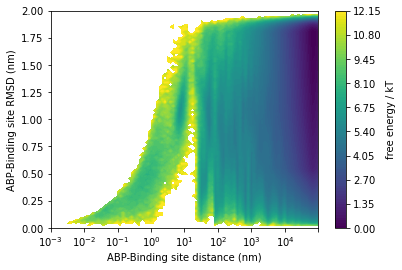

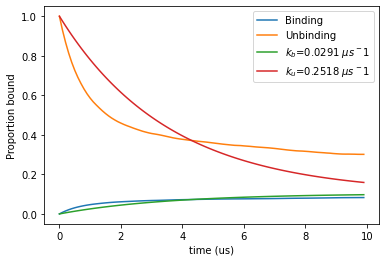

In [349]:
start=0
stride=1

selected_simulation=simulations.loc[266]

root=selected_simulation['root']
dcd=selected_simulation['dcd']
cif=selected_simulation['cif']
#!vmd -e ../Box_vis_500.vmd $cif $dcd


try:
    cif=prody.parseMMCIF(selected_simulation['cif'])
except KeyError:
    pass #continue
pdbx=mdtraj.formats.pdbx.load_pdbx(selected_simulation['cif'])
dcd=mdtraj.load_dcd(selected_simulation['dcd'],top=pdbx)
dcd.unitcell_vectors=np.array([[[500,0,0],[0,500,0],[0,0,500]]]*len(dcd))

if len(dcd)<1000:
    print(root,len(dcd))
    pass #continue

s={}
for name in ['Aa','Ab','Ac','Ca','Cb','Cd']:
    selection=cif.select(f'name {name}')
    #dcd.setAtoms(selection)
    s.update({name:selection.getIndices()})
#d1=np.array([sdist.cdist(a,b) for a,b in zip(s['Aa'],s['Ca'])])
#d2=np.array([sdist.cdist(a,b) for a,b in zip(s['Ab'],s['Cb'])])
#d3=np.array([sdist.cdist(a,b) for a,b in zip(s['Ac'],s['Cd'])])

selection=cif.select('name Ca')
dcdt=dcd[start::stride]

d1=mdtraj.compute_distances(dcdt,np.array([a for a in itertools.product(s['Aa'],s['Ca'])]),periodic=True)
d2=mdtraj.compute_distances(dcdt,np.array([a for a in itertools.product(s['Ab'],s['Cb'])]),periodic=True)
d3=mdtraj.compute_distances(dcdt,np.array([a for a in itertools.product(s['Ac'],s['Cd'])]),periodic=True)

actin_com=(dcdt.xyz[:,s['Aa']]+dcdt.xyz[:,s['Ab']]+dcdt.xyz[:,s['Ac']])/3
abp_com=(dcdt.xyz[:,s['Ca']]+dcdt.xyz[:,s['Cb']]+dcdt.xyz[:,s['Cd']])/3
translation=np.expand_dims(abp_com,axis=1)-np.expand_dims(actin_com,axis=2)
rmsd_abp=((((np.expand_dims(dcdt.xyz[:,s['Ca']],axis=1)-translation-np.expand_dims(dcdt.xyz[:,s['Aa']],axis=2))**2).sum(axis=3)+
           ((np.expand_dims(dcdt.xyz[:,s['Cb']],axis=1)-translation-np.expand_dims(dcdt.xyz[:,s['Ab']],axis=2))**2).sum(axis=3)+
           ((np.expand_dims(dcdt.xyz[:,s['Cd']],axis=1)-translation-np.expand_dims(dcdt.xyz[:,s['Ac']],axis=2))**2).sum(axis=3))/3)**.5
rmsd_abp.shape

dd=(d1**2+d2**2+d3**2)/3
g1=-1*(np.exp(-dd/1.0)+np.exp(-dd/0.01*1.0))/2*(d1<12.0)
g1.shape

g2=g1.reshape(len(g1),len(s['Aa']),len(s['Ca']))
g2.shape

g3_total_bind = (g2<-0.2).sum(axis=1).T>0
g3_partial_bind = (g2<0).sum(axis=1).T > 0
g3_states=[g3_total_bind[:,0]]
for t in range(1,len(g3_total_bind.T)):
    g3_state=g3_total_bind[:,t] | (g3_states[-1] & g3_partial_bind[:,t])
    g3_states+=[g3_state]
g3=np.array(g3_states).T
Actin_binding=g3*1

g3_total_bind = (g2<-0.2).sum(axis=2).T>0
g3_partial_bind = (g2<0).sum(axis=2).T > 0
g3_states=[g3_total_bind[:,0]]
for t in range(1,len(g3_total_bind.T)):
    g3_state=g3_total_bind[:,t] | (g3_states[-1] & g3_partial_bind[:,t])
    g3_states+=[g3_state]
g3=np.array(g3_states).T
ABP_binding=g3*1


Actin_binding[0].sum()

Actin_binding_pair=g2.argmin(axis=1).T
ABP_binding_pair=g2.argmin(axis=2).T
Actin_binding_pair[Actin_binding==0]=-99999
ABP_binding_pair[ABP_binding==0]=-99999

plt.figure(figsize=(10,5))
try:
    fig,ax=pyemma.plots.plot_free_energy(np.log10((dd**.5).ravel()),rmsd_abp.ravel(),cmap='viridis')
except ValueError:
    pass #continue
ax.set_xlim(-1.5,2.5)
ax.set_ylim(0,2)
ax.set_xticklabels([rf'$10^{{{i}}}$' for i in range(-3,5)])
ax.set_xlabel('ABP-Binding site distance (nm)')
ax.set_ylabel('ABP-Binding site RMSD (nm)')
plt.savefig(f'{root}_FreeEnergy.png')

sel=ABP_binding[:,200:]
skip=0
bound0=0
bound1=1
temp+=[[skip,bound0,bound1]]
temp=[[skip,bound0,bound1]]
for skip in range(1,100):
    bound0=sel[:,:-skip][sel[:,skip:]==0].mean()
    bound1=sel[:,:-skip][sel[:,skip:]==1].mean()
    t=skip*float(simulation['frequency'])/10**6
    temp+=[[t,bound0,bound1]]
b_t=pd.DataFrame(temp,columns=['t','B_0','B_1'])
t=b_t['t']

bound=b_t['B_0'].values
unbound=1-b_t['B_1'].values
bound_ratio=(bound/unbound)[1:]
K=bound_ratio.mean()
y=bound+unbound
kt=-np.log(1-y[1])/t[1]
k=scipy.optimize.curve_fit(lambda t,k : (1-np.exp(-k*t)), t, y, p0=[kt])[0][0]
k2=k/(1+K)
k1=k2*K
Aeq=k2/k
Beq=k1/k
plt.figure()
plt.plot(b_t['t'],b_t['B_0'])
plt.plot(b_t['t'],b_t['B_1'])
plt.plot(t,k1/(k1+k2)*(1-np.exp(-(k1+k2)*t)))
plt.plot(t,k1/(k1+k2)*(1-(1-(k1+k2)/k1)*np.exp(-(k1+k2)*t)))
plt.xlabel('time (us)')
plt.ylabel('Proportion bound')
plt.legend(['Binding',
            'Unbinding',
            r'$k_b$='f'{np.round(k1,4)} ' r'$\mu s^-1$',
            r'$k_u$='f'{np.round(k2,4)} ' r'$\mu s^-1$'])
plt.savefig(f'{root}_BindingRate.png')


<AxesSubplot:>

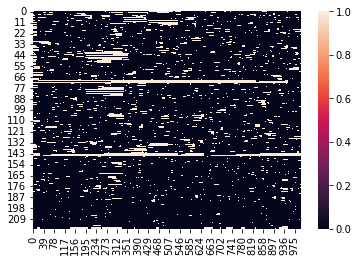

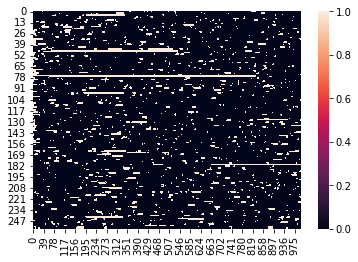

In [312]:
sns.heatmap(ABP_binding)
plt.figure()
sns.heatmap(Actin_binding)

<AxesSubplot:>

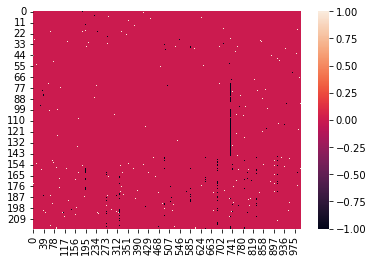

In [378]:
events=ABP_binding[:,1:]-ABP_binding[:,:-1]
sns.heatmap(events)

(532, 618)

In [225]:
ABP_binding[:,200:].shape

(219, 800)

/home/cb/miniconda3/envs/openmm_dev/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


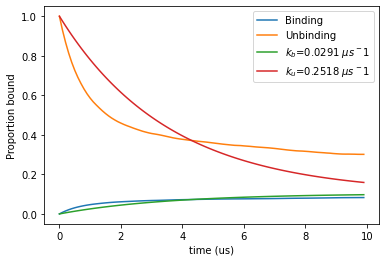

In [345]:
sel=ABP_binding[:,200:]
skip=0
bound0=0
bound1=1
temp+=[[skip,bound0,bound1]]
temp=[[skip,bound0,bound1]]
for skip in range(1,100):
    bound0=sel[:,:-skip][sel[:,skip:]==0].mean()
    bound1=sel[:,:-skip][sel[:,skip:]==1].mean()
    t=skip*float(simulation['frequency'])/10**6
    temp+=[[t,bound0,bound1]]
b_t=pd.DataFrame(temp,columns=['t','B_0','B_1'])
t=b_t['t']
plt.plot(b_t['t'],b_t['B_0'])
plt.plot(b_t['t'],b_t['B_1'])
plt.xlabel('time (us)')
plt.ylabel('Proportion bound')

bound=b_t['B_0'].values
unbound=1-b_t['B_1'].values
bound_ratio=(bound/unbound)[1:]
K=bound_ratio.mean()
y=bound+unbound
k=scipy.optimize.curve_fit(lambda t,k : (1-np.exp(-k*t)), t, y, p0=[kp])[0][0]
k2=k/(1+K)
k1=k2*K
Aeq=k2/k
Beq=k1/k

plt.plot(t,k1/(k1+k2)*(1-np.exp(-(k1+k2)*t)))
plt.plot(t,k1/(k1+k2)*(1-(1-(k1+k2)/k1)*np.exp(-(k1+k2)*t)))

plt.legend(['Binding',
            'Unbinding',
            r'$k_b$='f'{np.round(k1,4)} ' r'$\mu s^-1$',
            r'$k_u$='f'{np.round(k2,4)} ' r'$\mu s^-1$'])

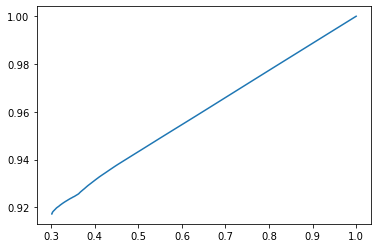

In [330]:
plt.plot(bound,unbound)

0.08277747796366253 0.6986386138613861 1.0143661613308672 1.064941524208202
0.07808419785255065 0.6670701777187271 0.8043091031307608 0.8721298260529116


Text(0.5, 0, 'time (us)')

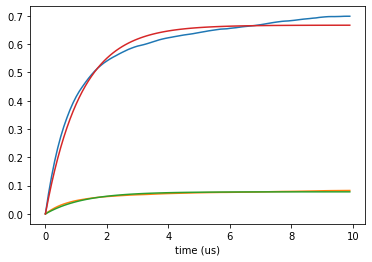

In [261]:
import scipy.optimize
t=(b_t['t']*float(simulation['frequency'])/10**6).values
bound=b_t['B_1'].values
unbound=1-b_t['B_0'].values

A=bound[-1]
kp=-np.log(1-bound[1]/A)/t[1]
B=unbound[-1]
km=-np.log(1-unbound[1]/B)/t[1]
print(A,B,kp,km)
result=scipy.optimize.curve_fit(lambda t,A,k : A*(1-np.exp(-k*t)), t, bound, p0=[A,kp])
A,kp=result[0]
result=scipy.optimize.curve_fit(lambda t,A,k : A*(1-np.exp(-k*t)), t, unbound, p0=[B,km])
B,km=result[0]
print(A,B,kp,km)
k=(kp+km)/2
K=A/B
plt.plot(t,1-b_t['B_0'])
plt.plot(t,b_t['B_1'])
plt.plot(t,A*(1-np.exp(-kp*t)))
plt.plot(t,B*(1-np.exp(-km*t)))
plt.xlabel('time (us)')

In [328]:
y[1]

1.921438896261596

In [348]:
bound_ratio=(bound/unbound)[1:]
K=bound_ratio.mean()
y=bound+unbound
kt=-np.log(1-y[1])/t[1]
k=scipy.optimize.curve_fit(lambda t,k : (1-np.exp(-k*t)), t, y, p0=[kt])[0][0]
k2=k/(1+K)
k1=k2*K


/home/cb/miniconda3/envs/openmm_dev/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


ValueError: array must not contain infs or NaNs

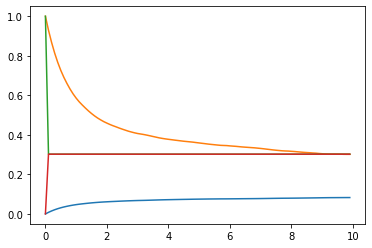

In [323]:
Aeq=k2/k
Beq=k1/k
plt.plot(t,b_t['B_0'])
plt.plot(t,b_t['B_1'])
plt.plot(t,k1/(k1+k2)*(1-(1-(k1+k2)/k1)*np.exp(-(k1+k2)*t)))
plt.plot(t,k1/(k1+k2)*(1-np.exp(-(k1+k2)*t)))

In [296]:
dcd=selected_simulation['dcd']
cif=selected_simulation['cif']
!vmd -e ../Box_vis_500.vmd $cif $dcd

Info) VMD for LINUXAMD64, version 1.9.4a55 (October 19, 2021)
Info) http://www.ks.uiuc.edu/Research/vmd/                         
Info) Email questions and bug reports to vmd@ks.uiuc.edu           
Info) Please include this reference in published work using VMD:   
Info)    Humphrey, W., Dalke, A. and Schulten, K., `VMD - Visual   
Info)    Molecular Dynamics', J. Molec. Graphics 1996, 14.1, 33-38.
Info) -------------------------------------------------------------
Info) Multithreading available, 12 CPUs, ISA dispatch enabled.
Info)   CPU features: SSE2 SSE4.1 AVX AVX2 FMA F16 HT 
Info) Free system memory: 91GB (72%)
Info) Creating CUDA device pool and initializing hardware...
Info) Detected 1 available CUDA accelerator::
Info) [0] NVIDIA GeForce RTX 3080 Ti 80 SM_8.6 1.7 GHz, 12GB RAM SP32 KT AE2 ZC
Info) OpenGL renderer: NVIDIA GeForce RTX 3080 Ti/PCIe/SSE2
Info)   Features: STENCIL MSAA(4) MDE CVA MTX NPOT PP PS GLSL(OVFGS) 
Info)   Full GLSL rendering mode is available.
Info)   Tex

In [ ]:
!vmd simu

In [280]:
k=np.array([[kp],[km]])/(kp+km)
y=k+(-k)*np.exp(-(kp+km)*t)



#plt.plot(t,y.T)


ValueError: object too deep for desired array

error: Result from function call is not a proper array of floats.

In [148]:
binding_probabilities=[0]
unbinding_probabilities=[0]
for skip in range(1,101):
    events=ABP_binding[:,skip:]-ABP_binding[:,:-skip]
    binding_probability=(events>0).sum(axis=0)/(ABP_binding[:,:-skip]==0).sum(axis=0)
    unbinding_probability=(events<0).sum(axis=0)/(ABP_binding[:,:-skip]==1).sum(axis=0)
    #plt.plot(binding_probability)
    #plt.plot(unbinding_probability)
    binding_probabilities+=[binding_probability.mean()]
    unbinding_probabilities+=[unbinding_probability.mean()]

In [163]:
t=np.arange(0,len(binding_probabilities))*float(simulation['frequency'])/10**6

Text(0.5, 0, 'time (us)')

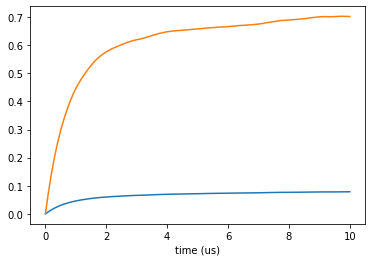

In [207]:
plt.plot(t,binding_probabilities)
plt.plot(t,unbinding_probabilities)
plt.xlabel('time (us)')

$$ [A] \xrightarrow{k_b} [B] $$
$$ [B] \xrightarrow{k_u} [A] $$
$$ \frac{d[A]}{dt} = k_u[B] - k_b[A] $$
$$ \frac{d[B]}{dt} = k_b[A] - k_u[B] $$
$$ [A](t) = {[A]}_{eq} + ({[A]}_0 – {[A]}_{eq})e^{–(k_1+k_2)t}$$
if ${[A]}_{eq} = 0$
$$ [A](t) = {[A]}_{eq} (1-e^{–(k_1+k_2)t})$$

In [188]:
A=binding_probabilities[-1]
k=-np.log(1-binding_probabilities[1]/A)/t[1]

1.0472065014884084e-06

In [194]:
t

array([       0.,   100000.,   200000.,   300000.,   400000.,   500000.,
         600000.,   700000.,   800000.,   900000.,  1000000.,  1100000.,
        1200000.,  1300000.,  1400000.,  1500000.,  1600000.,  1700000.,
        1800000.,  1900000.,  2000000.,  2100000.,  2200000.,  2300000.,
        2400000.,  2500000.,  2600000.,  2700000.,  2800000.,  2900000.,
        3000000.,  3100000.,  3200000.,  3300000.,  3400000.,  3500000.,
        3600000.,  3700000.,  3800000.,  3900000.,  4000000.,  4100000.,
        4200000.,  4300000.,  4400000.,  4500000.,  4600000.,  4700000.,
        4800000.,  4900000.,  5000000.,  5100000.,  5200000.,  5300000.,
        5400000.,  5500000.,  5600000.,  5700000.,  5800000.,  5900000.,
        6000000.,  6100000.,  6200000.,  6300000.,  6400000.,  6500000.,
        6600000.,  6700000.,  6800000.,  6900000.,  7000000.,  7100000.,
        7200000.,  7300000.,  7400000.,  7500000.,  7600000.,  7700000.,
        7800000.,  7900000.,  8000000.,  8100000., 

In [205]:
import scipy.optimize
t=np.arange(0,len(binding_probabilities))*float(simulation['frequency'])/10**6
A=binding_probabilities[-1]
kp=-np.log(1-binding_probabilities[1]/A)/t[1]
B=unbinding_probabilities[-1]
km=-np.log(1-unbinding_probabilities[1]/B)/t[1]
print(A,B,kp,km)
result=scipy.optimize.curve_fit(lambda t,A,k : A*(1-np.exp(-k*t)), t, binding_probabilities, p0=[A,kp])
A,kp=result[0]
result=scipy.optimize.curve_fit(lambda t,A,k : A*(1-np.exp(-k*t)), t, unbinding_probabilities, p0=[B,km])
B,km=result[0]
print(A,B,kp,km)
k=(kp+km)/2
K=A/B


0.07869381165912244 0.7018723902146848 1.0472065014884084 1.1674407514348824
0.07500982493986745 0.6748918062142443 0.8463737259183681 1.0146321659120354


In [201]:
np.exp(-100)

3.720075976020836e-44

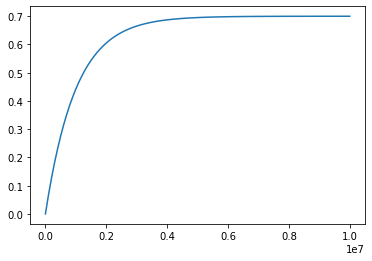

In [176]:
k=1E-6
plt.plot(t,0.7*(1-np.exp(-k*t)))

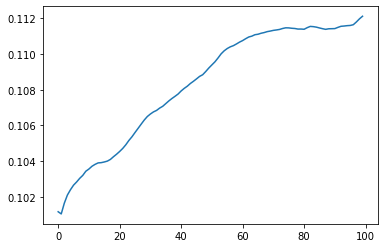

In [147]:
plt.plot(np.array(binding_probabilities) / np.array(unbinding_probabilities))

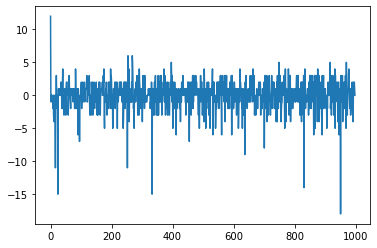

In [91]:
plt.plot((events>0).sum(axis=0)-(events<0).sum(axis=0))
#plt.plot((events<0).sum(axis=0))

In [110]:
((events>0).sum(axis=0)-(events<0).sum(axis=0))[50:]

array([ -3,   1,   2,   2,   2,   0,   1,   0,  -3,  -1,   0,   3,   1,
         0,   1,  -1,  -2,   1,   0,   0,   0,   1,   1,   1,  -1,   0,
         0,   1,   0,  -2,   0,  -2,   4,   1,  -2,   1,   0,   0,   0,
         1,  -6,   1,   0,  -1,  -1,  -7,  -2,   0,   0,   0,   1,   2,
        -2,   0,   0,   2,   0,  -1,   0,   0,   1,   2,  -1,   0,   1,
         1,   1,   1,   2,   3,  -1,  -1,   0,   0,   2,   2,   1,   3,
        -1,  -3,  -1,  -1,   0,  -3,   2,   1,   0,   1,   2,  -3,   0,
         0,   1,   2,  -2,   0,  -1,  -1,  -1,   1,   2,  -2,  -1,  -3,
         1,  -3,   1,   0,  -1,   2,   1,   2,   1,  -3,   0,   0,   1,
         1,   1,   1,   2,   0,   0,   3,   2,   4,  -3,  -5,  -1,  -1,
        -1,   1,   0,   2,   0,  -3,   0,   0,  -2,  -2,   2,   1,   1,
         0,   2,   1,  -2,   4,   0,   3,   2,  -2,   0,   0,  -5,  -1,
         1,   1,  -1,   0,   1,   2,  -2,   0,   1,   2,   1,   0,   2,
        -5,   1,   0,  -1,   0,   0,   1,   2,   2,   0,   0,   

<AxesSubplot:>

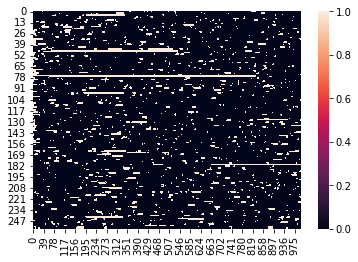

In [89]:
sns.heatmap(Actin_binding)

In [84]:
dcd=selected_simulation['dcd']
cif=selected_simulation['cif']
!vmd -e ../Box_vis_500.vmd $cif $dcd

Info) VMD for LINUXAMD64, version 1.9.4a55 (October 19, 2021)
Info) http://www.ks.uiuc.edu/Research/vmd/                         
Info) Email questions and bug reports to vmd@ks.uiuc.edu           
Info) Please include this reference in published work using VMD:   
Info)    Humphrey, W., Dalke, A. and Schulten, K., `VMD - Visual   
Info)    Molecular Dynamics', J. Molec. Graphics 1996, 14.1, 33-38.
Info) -------------------------------------------------------------
Info) Multithreading available, 12 CPUs, ISA dispatch enabled.
Info)   CPU features: SSE2 SSE4.1 AVX AVX2 FMA F16 HT 
Info) Free system memory: 91GB (72%)
Info) Creating CUDA device pool and initializing hardware...
Info) Detected 1 available CUDA accelerator::
Info) [0] NVIDIA GeForce RTX 3080 Ti 80 SM_8.6 1.7 GHz, 12GB RAM SP32 KT AE2 ZC
Info) OpenGL renderer: NVIDIA GeForce RTX 3080 Ti/PCIe/SSE2
Info)   Features: STENCIL MSAA(4) MDE CVA MTX NPOT PP PS GLSL(OVFGS) 
Info)   Full GLSL rendering mode is available.
Info)   Tex

@> 10480 atoms and 1 coordinate set(s) were parsed in 0.09s.


Text(0, 0.5, 'Energy')

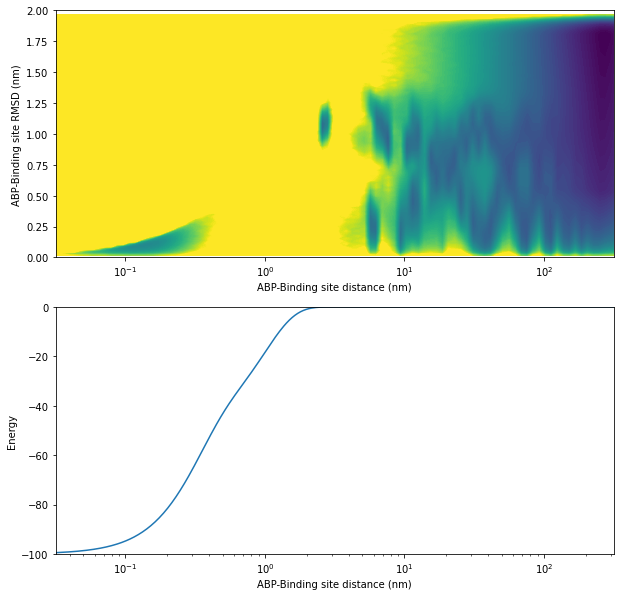

In [223]:
selected_simulation=simulations.loc[0]

root=selected_simulation['root']
dcd=selected_simulation['dcd']
cif=selected_simulation['cif']
#!vmd -e ../Box_vis_500.vmd $cif $dcd


cif=prody.parseMMCIF(selected_simulation['cif'])
pdbx=mdtraj.formats.pdbx.load_pdbx(selected_simulation['cif'])
dcd=mdtraj.load_dcd(selected_simulation['dcd'],top=pdbx)
dcd.unitcell_vectors=np.array([[[500,0,0],[0,500,0],[0,0,500]]]*len(dcd))

s={}
for name in ['Aa','Ab','Ac','Ca','Cb','Cd']:
    selection=cif.select(f'name {name}')
    #dcd.setAtoms(selection)
    s.update({name:selection.getIndices()})
#d1=np.array([sdist.cdist(a,b) for a,b in zip(s['Aa'],s['Ca'])])
#d2=np.array([sdist.cdist(a,b) for a,b in zip(s['Ab'],s['Cb'])])dd_temp
#d3=np.array([sdist.cdist(a,b) for a,b in zip(s['Ac'],s['Cd'])])

selection=cif.select('name Ca')

d1=mdtraj.compute_distances(dcd[::stride],np.array([a for a in itertools.product(s['Aa'],s['Ca'])]),periodic=True)
d2=mdtraj.compute_distances(dcd[::stride],np.array([a for a in itertools.product(s['Ab'],s['Cb'])]),periodic=True)
d3=mdtraj.compute_distances(dcd[::stride],np.array([a for a in itertools.product(s['Ac'],s['Cd'])]),periodic=True)

actin_com=(dcd[::stride].xyz[:,s['Aa']]+dcd[::stride].xyz[:,s['Ab']]+dcd[::stride].xyz[:,s['Ac']])/3
abp_com=(dcd[::stride].xyz[:,s['Ca']]+dcd[::stride].xyz[:,s['Cb']]+dcd[::stride].xyz[:,s['Cd']])/3
translation=np.expand_dims(abp_com,axis=1)-np.expand_dims(actin_com,axis=2)
rmsd_abp=((((np.expand_dims(dcd[::stride].xyz[:,s['Ca']],axis=1)-translation-np.expand_dims(dcd[::stride].xyz[:,s['Aa']],axis=2))**2).sum(axis=3)+
           ((np.expand_dims(dcd[::stride].xyz[:,s['Cb']],axis=1)-translation-np.expand_dims(dcd[::stride].xyz[:,s['Ab']],axis=2))**2).sum(axis=3)+
           ((np.expand_dims(dcd[::stride].xyz[:,s['Cd']],axis=1)-translation-np.expand_dims(dcd[::stride].xyz[:,s['Ac']],axis=2))**2).sum(axis=3))/3)**.5
rmsd_abp.shape

dd=(d1**2+d2**2+d3**2)/3
g1=-1*(np.exp(-dd/1.0)+np.exp(-dd/0.01*1.0))/2*(d1<12.0)
g1.shape

g2=g1.reshape(len(g1),len(s['Aa']),len(s['Ca']))
g2.shape

g3_total_bind = (g2<-0.2).sum(axis=1).T>0
g3_partial_bind = (g2<0).sum(axis=1).T > 0
g3_states=[g3_total_bind[:,0]]
for t in range(1,len(g3_total_bind.T)):
    g3_state=g3_total_bind[:,t] | (g3_states[-1] & g3_partial_bind[:,t])
    g3_states+=[g3_state]
g3=np.array(g3_states).T
Actin_binding=g3*1

g3_total_bind = (g2<-0.2).sum(axis=2).T>0
g3_partial_bind = (g2<0).sum(axis=2).T > 0
g3_states=[g3_total_bind[:,0]]
for t in range(1,len(g3_total_bind.T)):
    g3_state=g3_total_bind[:,t] | (g3_states[-1] & g3_partial_bind[:,t])
    g3_states+=[g3_state]
g3=np.array(g3_states).T
ABP_binding=g3*1


Actin_binding[0].sum()

Actin_binding_pair=g2.argmin(axis=1).T
ABP_binding_pair=g2.argmin(axis=2).T
Actin_binding_pair[Actin_binding==0]=-99999
ABP_binding_pair[ABP_binding==0]=-99999

fig,(ax1,ax2)=plt.subplots(2,figsize=(10,10))
fig,ax=pyemma.plots.plot_free_energy(np.log10((dd**.5).ravel()),rmsd_abp.ravel(),cmap='viridis',
                                     ax=ax1,cbar=False,vmin=0,vmax=12)
#ax.set_xlim(-3,4)
ax1.set_xlim(-1.5,2.5)
ax1.set_ylim(0,2)
ax1.set_xticks(np.arange(-1,3))
ax1.set_xticklabels([rf'$10^{{{round(i,1)}}}$' for i in np.arange(-1,3)])
ax1.set_xlabel('ABP-Binding site distance (nm)')
ax1.set_ylabel('ABP-Binding site RMSD (nm)')
epsilon=float(selected_simulation['epsilon'])
w1=float(selected_simulation['w1'])
w2=float(selected_simulation['w1'])*float(selected_simulation['w2_ratio'])

x=np.logspace(-2,3,500)
y=-epsilon*(np.exp(-x**2/w1)+np.exp(-x**2/w2))/2*(x<120)
ax2.plot(x,y)
ax2.set_ylim(-epsilon,0)
ax2.set_xlim(10**-1.5,10**2.5)
ax2.semilogx()
ax2.set_xlabel('ABP-Binding site distance (nm)')
ax2.set_ylabel('Energy')

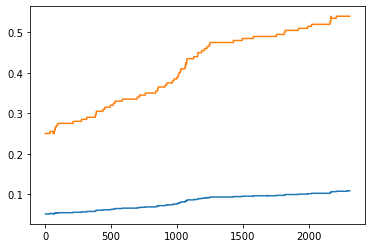

In [224]:
plt.plot(ABP_binding.sum(axis=0)/len(ABP_binding))
plt.plot(Actin_binding.sum(axis=0)/len(Actin_binding))

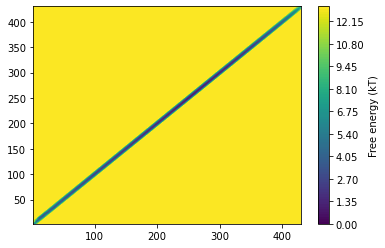

In [212]:
fig,ax=pyemma.plots.plot_free_energy((dd**.5).ravel(),d1.ravel(),cmap='viridis')

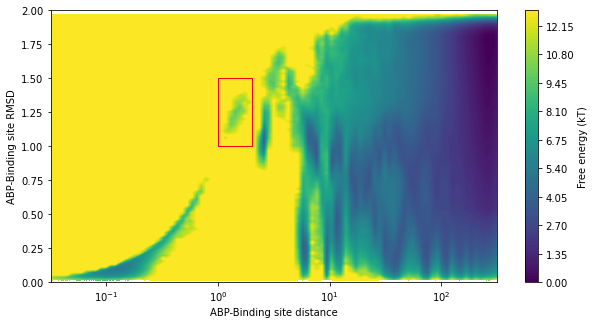

In [201]:
import matplotlib.patches as patches
plt.figure(figsize=(10,5))
fig,ax=pyemma.plots.plot_free_energy(np.log10((dd**.5).ravel()),rmsd_abp.ravel(),cmap='viridis')
ax.set_xlim(-1.5,2.5)
ax.set_ylim(0,2)
ax.set_xticks(np.arange(-1,3))
ax.set_xticklabels([rf'$10^{{{round(i,1)}}}$' for i in np.arange(-1,3)])
ax.set_xlabel('ABP-Binding site distance')
ax.set_ylabel('ABP-Binding site RMSD')
dd_lims=(1,2) #Square1
rmsd_lims=(1,1.5) #Square1
#dd_lims=(2,4) #Square2
#rmsd_lims=(0.7,1.75) #Square2

rect = patches.Rectangle((np.log10(dd_lims[0]), rmsd_lims[0]), 
                         np.log10(dd_lims[1])-np.log10(dd_lims[0]), 
                         rmsd_lims[1]-rmsd_lims[0], linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

<AxesSubplot:>

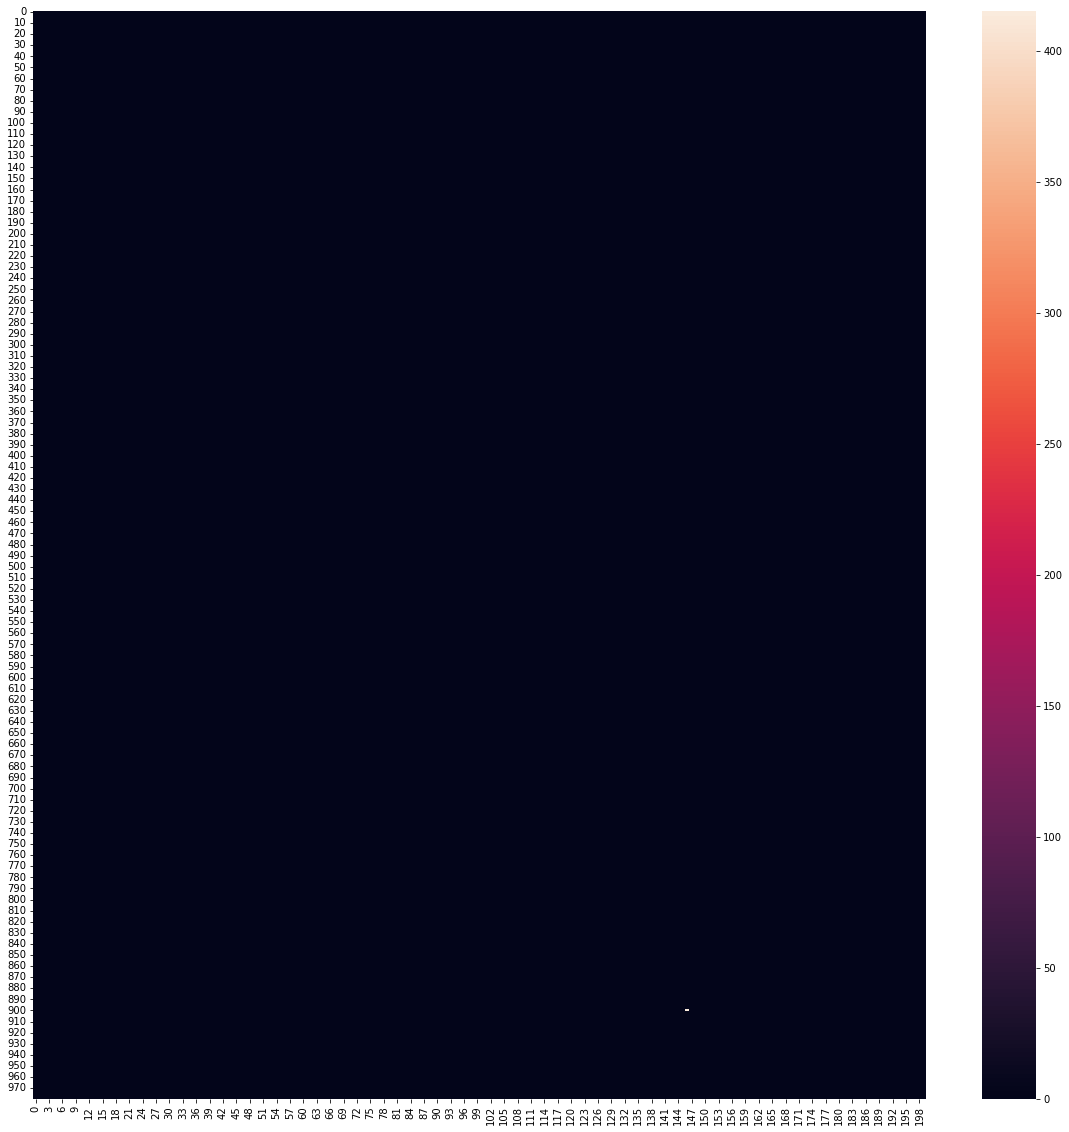

In [202]:
dd_temp=(dd**.5).reshape(rmsd_abp.shape)
selection=((dd_temp>=dd_lims[0]) & (dd_temp<=dd_lims[1]) & (rmsd_abp>=rmsd_lims[0]) & (rmsd_abp<=rmsd_lims[1])).reshape(rmsd_abp.shape)
plt.figure(figsize=(20,20))
sns.heatmap(selection.sum(axis=0))

In [203]:
selection.sum(),selection.sum(axis=0).max()

(415, 415)

(900, 146)
890


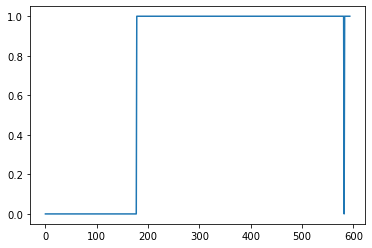

In [204]:
example_binding=np.unravel_index(selection.sum(axis=0).argmax(),selection.shape[1:])
print(example_binding)
plt.plot(selection[:,example_binding[0],example_binding[1]])
print(selection[:,example_binding[0],example_binding[1]].argmax()*5)

In [205]:
print(s['Aa'][example_binding[0]],s['Ab'][example_binding[0]],s['Ac'][example_binding[0]],
      s['Ca'][example_binding[1]],s['Cb'][example_binding[1]],s['Cd'][example_binding[1]])


9083 9084 9085 10318 10319 10320


In [207]:
dcd=selected_simulation['dcd']
cif=selected_simulation['cif']
!vmd -e ../Box_vis_500.vmd $cif $dcd

Info) VMD for LINUXAMD64, version 1.9.4a55 (October 19, 2021)
Info) http://www.ks.uiuc.edu/Research/vmd/                         
Info) Email questions and bug reports to vmd@ks.uiuc.edu           
Info) Please include this reference in published work using VMD:   
Info)    Humphrey, W., Dalke, A. and Schulten, K., `VMD - Visual   
Info)    Molecular Dynamics', J. Molec. Graphics 1996, 14.1, 33-38.
Info) -------------------------------------------------------------
Info) Multithreading available, 12 CPUs, ISA dispatch enabled.
Info)   CPU features: SSE2 SSE4.1 AVX AVX2 FMA F16 HT 
Info) Free system memory: 42GB (66%)
Info) Creating CUDA device pool and initializing hardware...
Info) Detected 1 available CUDA accelerator::
Info) [0] NVIDIA GeForce RTX 3080 Ti 80 SM_8.6 1.7 GHz, 12GB RAM SP32 KT AE2 ZC
Info) OpenGL renderer: NVIDIA GeForce RTX 3080 Ti/PCIe/SSE2
Info)   Features: STENCIL MSAA(4) MDE CVA MTX NPOT PP PS GLSL(OVFGS) 
Info)   Full GLSL rendering mode is available.
Info)   Tex

In [275]:
#Stay time
#Kon ->per ABP site/per ABP
#Koff
#1D Diffusion


g1.shape

(705, 196000)

In [276]:
g1.sum(axis=0).argmin()

97883

In [277]:
d1.max(),d1.min()

(432.53467, 0.04042675)

(-1.0, 0.0)

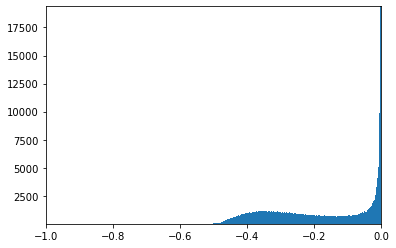

In [550]:
import matplotlib.pyplot as plt
%matplotlib inline
h=plt.hist(g1.ravel(),bins=500)
#plt.semilogy()
plt.ylim(1,h[0][:-1].max())
plt.xlim(-1,0)

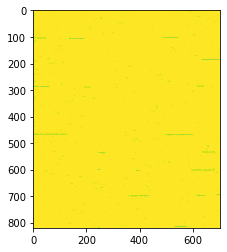

In [126]:
plt.imshow(g1[:,g1.sum(axis=0)<0].T)

In [25]:
import pyemma
pyemma.__version__

'2.4'

In [157]:
temp=g1[:,g1.sum(axis=0)<0].T<0
temp=temp.astype(int)
for lag in range(1,20):
    msm=pyemma.msm.estimate_markov_model(temp.tolist(),lag=lag)
    print(msm.transition_matrix)

[[0.99748292 0.00251708]
 [0.73532338 0.26467662]]
[[0.99736444 0.00263556]
 [0.78198108 0.21801892]]
[[0.99735022 0.00264978]
 [0.79720976 0.20279024]]
[[0.99730454 0.00269546]
 [0.8159601  0.1840399 ]]
[[0.99728145 0.00271855]
 [0.82875686 0.17124314]]
[[0.99728456 0.00271544]
 [0.83416583 0.16583417]]
[[0.99725963 0.00274037]
 [0.84792396 0.15207604]]
[[0.99729608 0.00270392]
 [0.8432649  0.1567351 ]]
[[0.99724999 0.00275001]
 [0.85914787 0.14085213]]
[[0.99728302 0.00271698]
 [0.85283777 0.14716223]]
[[0.99725795 0.00274205]
 [0.86260694 0.13739306]]
[[0.9972434 0.0027566]
 [0.8698941 0.1301059]]
[[0.99722174 0.00277826]
 [0.87670541 0.12329459]]
[[0.9972372  0.0027628 ]
 [0.87348178 0.12651822]]
[[0.9972527  0.0027473 ]
 [0.87031408 0.12968592]]
[[0.99722029 0.00277971]
 [0.88235294 0.11764706]]
[[0.99722336 0.00277664]
 [0.88268156 0.11731844]]
[[0.99718369 0.00281631]
 [0.89730554 0.10269446]]
[[0.99721347 0.00278653]
 [0.89013225 0.10986775]]


In [99]:
np.asscalar(g1)

/home/cb/miniconda3/envs/openmm_dev/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """Entry point for launching an IPython kernel.


ValueError: can only convert an array of size 1 to a Python scalar

In [94]:
np.random.choice(g1[:1000].ravel(),100)

array([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0.], dtype=float32)

In [95]:
np.array([[[1,0,0],[0,1,0],[0,0,1]]]*len(dcd)).shape

(38, 3, 3)

In [13]:
dcd.unitcell_distances.

(15829,)